# PROJECT_2

In [1]:
!pip install opendatasets

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import opendatasets as od

In [4]:
dataset = 'https://www.kaggle.com/datasets/abhishek14398/heart-disease-classification'

In [5]:
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: elamathiramesh
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 3.45k/3.45k [00:00<00:00, 890kB/s]

In [6]:
import os

In [7]:
data_dir = '.\heart-disease-classification'

In [8]:
os.listdir(data_dir)

['heart.csv']

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
heart_df = pd.read_csv('heart.csv')
heart_df

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 1 understanding the data

In [13]:
heart_df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
heart_df.shape

(303, 14)

In [15]:
heart_df.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
heart_df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal', 'target'],
      dtype='object')

In [17]:
heart_df.nunique()

age                     41
sex                      2
chest_pain_type          4
resting_bp              49
cholestoral            152
fasting_blood_sugar      2
restecg                  3
max_hr                  91
exang                    2
oldpeak                 40
slope                    3
num_major_vessels        5
thal                     4
target                   2
dtype: int64

In [18]:
heart_df['target'].unique()

array([1, 0], dtype=int64)

# 2 cleaning the data 

In [19]:
heart_df.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

# 3 relationship analysis

In [20]:
corelation = heart_df.corr()

<AxesSubplot:>

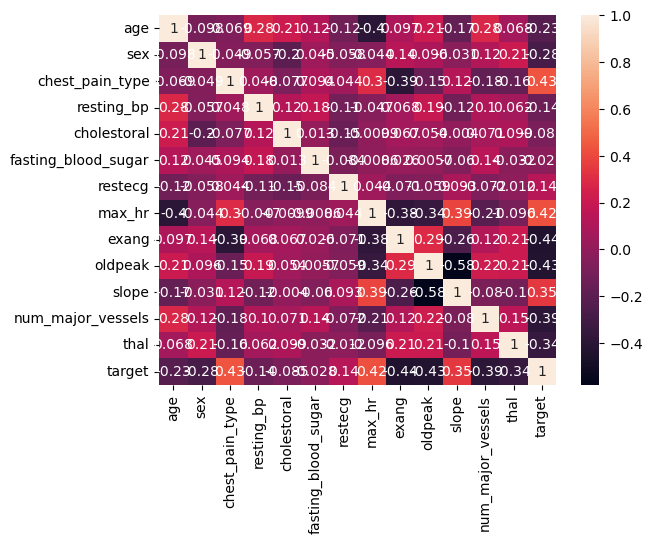

In [21]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

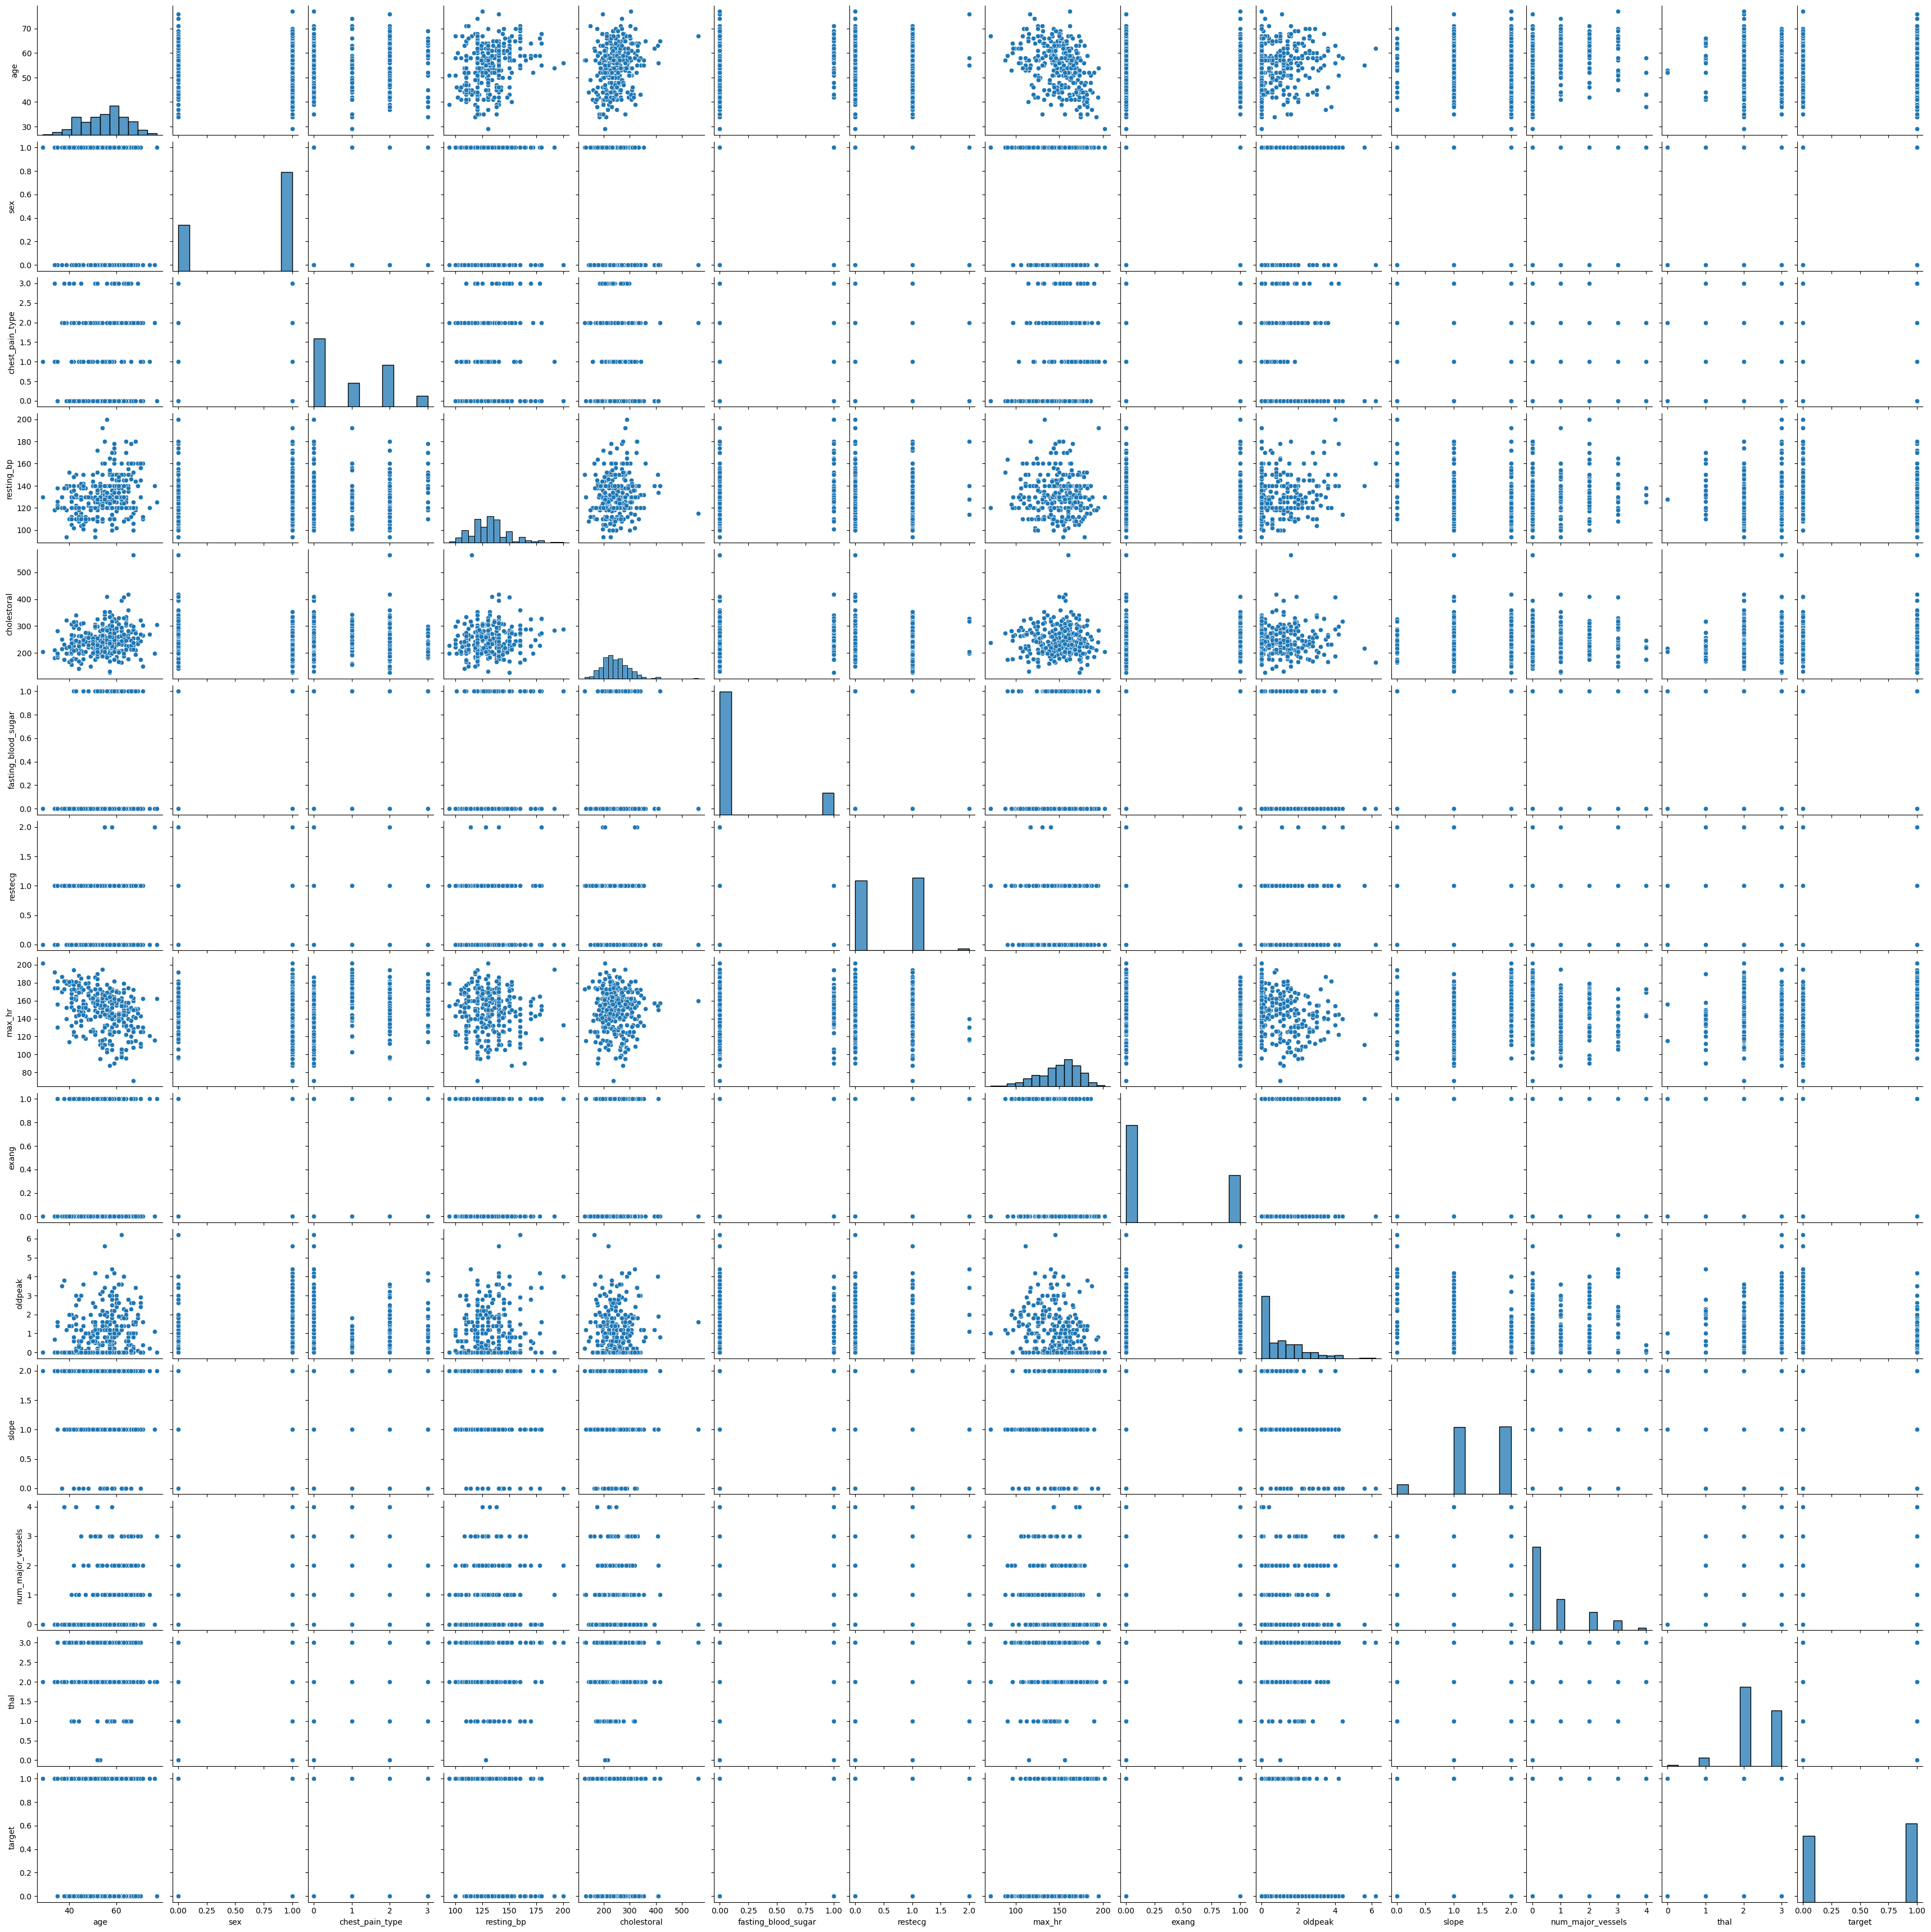

In [22]:
sns.pairplot(heart_df)

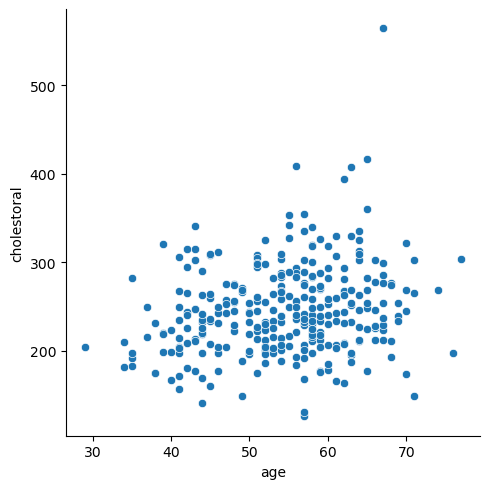

In [23]:
sns.relplot(x='age',y='cholestoral',data=heart_df)

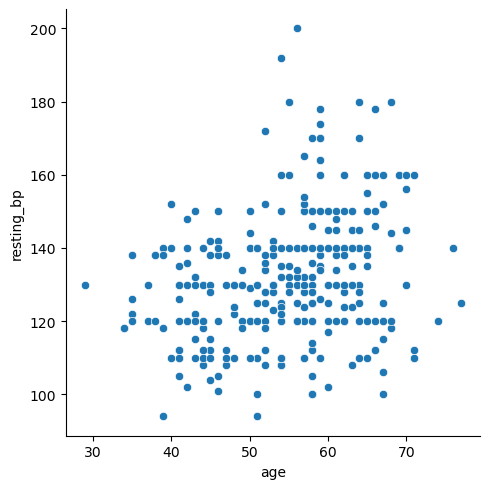

In [24]:
sns.relplot(x='age',y='resting_bp',data=heart_df)

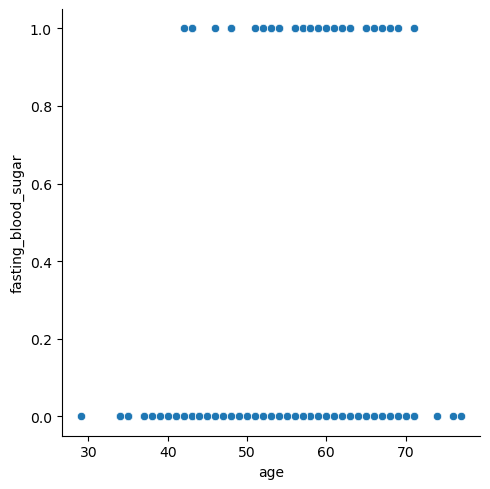

In [26]:
sns.relplot(x ='age',y='fasting_blood_sugar',data=heart_df)

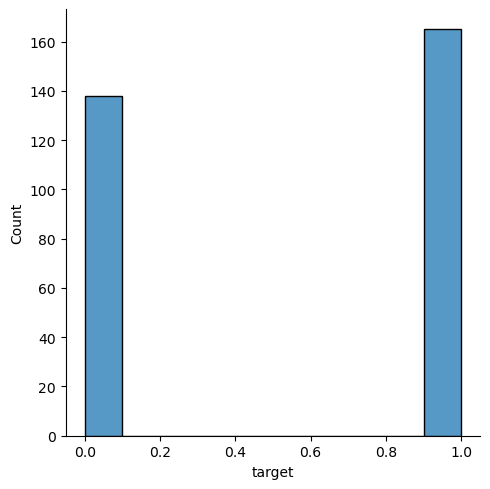

In [27]:
sns.displot(heart_df['target'])

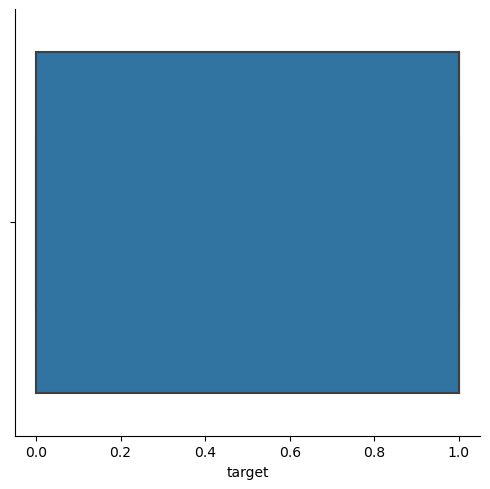

In [28]:
sns.catplot(x='target',kind='box',data=heart_df)

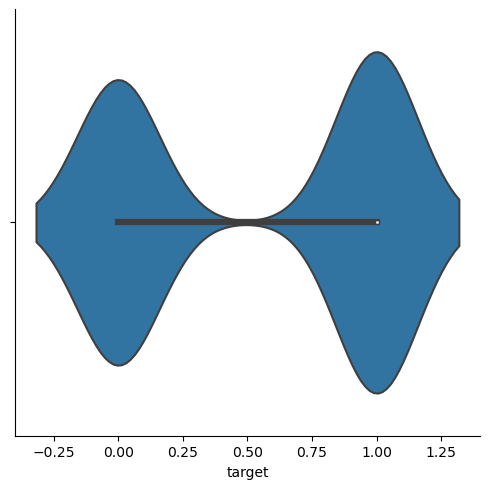

In [29]:
sns.catplot(x='target',kind='violin',data=heart_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


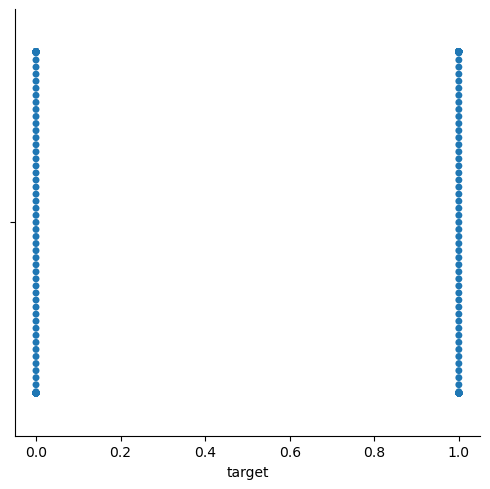

In [32]:
sns.catplot(x='target',kind='swarm',data=heart_df)